In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 

start = time.perf_counter()

In [33]:
df = pd.read_csv('earl694412-infinite-matchhistory.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               817 non-null    object 
 1   SeasonNumber       817 non-null    int64  
 2   SeasonVersion      817 non-null    int64  
 3   Player             817 non-null    object 
 4   MatchId            817 non-null    object 
 5   Map                817 non-null    object 
 6   Category           817 non-null    object 
 7   Playlist           817 non-null    object 
 8   Input              817 non-null    object 
 9   Queue              817 non-null    object 
 10  PreCsr             817 non-null    int64  
 11  PostCsr            817 non-null    int64  
 12  Rank               817 non-null    int64  
 13  WasAtStart         817 non-null    int64  
 14  WasAtEnd           817 non-null    int64  
 15  WasInProgressJoin  817 non-null    int64  
 16  Mmr                2 non-n

In [34]:
df['Date'] = pd.to_datetime(df['Date'])
df['LengthMinutes'] = df['LengthSeconds'] / 60
df.rename(columns={'TotalKills': 'Kills'}, inplace=True)
df['KillsBody'] = df['Kills'] - df['KillsGrenade'] - df['KillsHeadshot'] - df['KillsMelee'] - df['KillsPower']
df['DamageRatio'] = df['DamageDone'] / df['DamageTaken']
df['Damage/Kill'] = df['DamageDone'] / df['Kills']
# Per 10 Min
df['Kills/10Min'] = (df['Kills'] / df['LengthMinutes']) * 10
df['Deaths/10Min'] = (df['Deaths'] / df['LengthMinutes']) * 10
df['Assists/10Min'] = (df['Assists'] / df['LengthMinutes']) * 10
df['Dmg/10Min'] = (df['DamageDone'] / df['LengthMinutes']) * 10
df['DmgT/10Min'] = (df['DamageTaken'] / df['LengthMinutes']) * 10
df['Shots/10Min'] = (df['ShotsFired'] / df['LengthMinutes']) * 10
# Excess
df['ExcessKills'] = df['Kills'] - df['ExpectedKills']
df['ExcessDeaths'] = df['ExpectedDeaths'] - df['Deaths']
# Kill Type
df['BodyPct'] = df['KillsBody'] / df['Kills'] *100
df['MeleePct'] = df['KillsMelee'] / df['Kills'] * 100
df['HSPct'] = df['KillsHeadshot'] / df['Kills'] * 100
df['GrenadePct'] = df['KillsGrenade'] / df['Kills'] * 100
df['PowerPct'] = df['KillsPower'] / df['Kills'] * 100



df = df.drop(['Player', 'MatchId', 'Input', 'Queue', 'Mmr', 'PreCsr', 'PostCsr', 'ShotsFired', 'AssistsEmp',
              'ShotsMissed', 'ShotsLanded', 'Betrayals', 'Suicides', 'WasAtStart', 'WasAtEnd', 'AssistsDriver',
              'Perfects', 'WasInProgressJoin', 'VehicleDestroys', 'VehicleHijacks', 'AssistsCallout',
              'LengthSeconds', 'Rank', 'SeasonNumber', 'SeasonVersion', 'Map'],axis=1)
df = df.drop(['KillsBody','KillsMelee', 'KillsGrenade', 'KillsHeadshot', 'KillsPower'], axis=1)
dfR = df[df['Playlist'] == 'Ranked Arena']
dfRR = dfR[dfR['Date']> '2023-01-01']
dfRR = dfRR[dfRR['Outcome'] != 'Draw']
dfRR = dfRR[dfRR['Outcome'] != 'Left']
dfRR['Outcome'] = dfRR['Outcome'].map({'Win': 1, 'Loss': 0})
dfRR = dfRR.drop(['Date', 'Category', 'Playlist'], axis=1)
dfRR = dfRR.dropna()
dfRR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 140 to 816
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Outcome         563 non-null    int64  
 1   Accuracy        563 non-null    float64
 2   DamageDone      563 non-null    int64  
 3   DamageTaken     563 non-null    int64  
 4   KD              563 non-null    float64
 5   KDA             563 non-null    float64
 6   Kills           563 non-null    int64  
 7   Deaths          563 non-null    int64  
 8   Assists         563 non-null    int64  
 9   MaxSpree        563 non-null    int64  
 10  ExpectedKills   563 non-null    float64
 11  ExpectedDeaths  563 non-null    float64
 12  Score           563 non-null    int64  
 13  Medals          563 non-null    int64  
 14  LengthMinutes   563 non-null    float64
 15  DamageRatio     563 non-null    float64
 16  Damage/Kill     563 non-null    float64
 17  Kills/10Min     563 non-null    f

In [35]:
def cnt(df, col):
    count = df[col].count()
    return count
def sm(df, col):
    sum = df[col].sum()
    return sum
def avg(df, col, val=None):
    avg = round(sm(df, col) / cnt(df, col),val)
    return avg


In [36]:
corr_mtrx = dfRR.corr().abs()
print(corr_mtrx['Outcome'].sort_values(ascending=False))

Outcome           1.000000
Deaths/10Min      0.429347
DmgT/10Min        0.349314
KD                0.313207
Deaths            0.298172
KDA               0.282448
ExcessDeaths      0.254239
DamageTaken       0.228720
ExpectedDeaths    0.189120
Damage/Kill       0.187038
Assists/10Min     0.174173
Kills/10Min       0.151698
DamageRatio       0.122970
MaxSpree          0.118237
LengthMinutes     0.117462
Accuracy          0.090517
DamageDone        0.075803
Assists           0.058911
Score             0.050177
Dmg/10Min         0.042293
BodyPct           0.039391
Medals            0.037139
HSPct             0.029995
Shots/10Min       0.015877
ExpectedKills     0.015706
MeleePct          0.011657
ExcessKills       0.010677
Kills             0.004414
PowerPct          0.002878
GrenadePct        0.001990
Name: Outcome, dtype: float64


In [37]:
# dfRR.hist(bins=15, figsize=(16, 12))
# plt.tight_layout()
# plt.show()

In [38]:
dfRR.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Outcome,563.0,0.545293,0.498387,0.000000,0.000000,1.000000,1.000000,1.000000
Accuracy,563.0,51.653748,5.082583,36.800000,48.455000,51.650000,54.720000,80.560000
DamageDone,563.0,5247.293073,1835.767508,667.000000,3903.000000,4993.000000,6439.500000,12673.000000
DamageTaken,563.0,4459.056838,1530.842618,35.000000,3457.500000,4262.000000,5457.000000,9962.000000
KD,563.0,1.275631,0.756907,0.270000,0.860000,1.130000,1.455000,10.000000
KDA,563.0,4.626181,5.594261,-9.660000,0.660000,4.660000,8.000000,31.000000
Kills,563.0,14.660746,6.349013,1.000000,10.000000,14.000000,18.000000,40.000000
Deaths,563.0,12.845471,5.119490,0.000000,10.000000,12.000000,16.000000,32.000000
Assists,563.0,8.438721,4.200626,1.000000,6.000000,8.000000,10.500000,28.000000
MaxSpree,563.0,3.982238,1.583850,1.000000,3.000000,4.000000,5.000000,10.000000


In [39]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
# Define features (X) and target variable (y)
X = dfRR.drop('Outcome', axis=1) 
X = round(X,20)
y = dfRR['Outcome'] 

print(f'X Shape: {X.shape}')
print(f'Y Shape: {y.shape}')

X Shape: (563, 29)
Y Shape: (563,)


In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=69)
print(f'X Train Shape: {X_train.shape}')
print(f'X Test Shape: {X_test.shape}')
print(X_train.columns)
print(X_test.info())



X Train Shape: (450, 29)
X Test Shape: (113, 29)
Index(['Accuracy', 'DamageDone', 'DamageTaken', 'KD', 'KDA', 'Kills', 'Deaths',
       'Assists', 'MaxSpree', 'ExpectedKills', 'ExpectedDeaths', 'Score',
       'Medals', 'LengthMinutes', 'DamageRatio', 'Damage/Kill', 'Kills/10Min',
       'Deaths/10Min', 'Assists/10Min', 'Dmg/10Min', 'DmgT/10Min',
       'Shots/10Min', 'ExcessKills', 'ExcessDeaths', 'BodyPct', 'MeleePct',
       'HSPct', 'GrenadePct', 'PowerPct'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 551 to 480
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Accuracy        113 non-null    float64
 1   DamageDone      113 non-null    int64  
 2   DamageTaken     113 non-null    int64  
 3   KD              113 non-null    float64
 4   KDA             113 non-null    float64
 5   Kills           113 non-null    int64  
 6   Deaths          113 non-null    int64 

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Accuracy', 'DamageDone', 'DamageTaken', 'KD', 'KDA', 'Kills',
                                    'Deaths', 'Assists', 'MaxSpree', 'ExpectedKills', 'ExpectedDeaths',
                                    'Score', 'Medals', 'LengthMinutes', 'DamageRatio', 'Damage/Kill',
                                    'Kills/10Min', 'Deaths/10Min', 'Assists/10Min', 'Dmg/10Min',
                                    'DmgT/10Min', 'Shots/10Min', 'ExcessKills', 'ExcessDeaths',
                                    'BodyPct', 'MeleePct', 'HSPct', 'GrenadePct', 'PowerPct'])])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# X_train_preprocessed.to_csv('X_train_preprocessed.csv')
# X_test_preprocessed.to_csv('X_test_preprocessed.csv')

print(f'X Train Processed Shape: {X_train_preprocessed.shape}')
print(f'X Train Shape: {X_train.shape}')
print(f'X Test Processed Shape: {X_test_preprocessed.shape}')

X Train Processed Shape: (450, 29)
X Train Shape: (450, 29)
X Test Processed Shape: (113, 29)


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, log_loss, classification_report, confusion_matrix
MSE_Histmean = mean_squared_error(y_test,np.full(y_test.shape,np.mean(y_train)))

def ResultsOut(model):
  y_pred = model.predict(X_test_preprocessed)
  # Calculate regression metrics
  acc = model.score(X_test_preprocessed, y_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  r2 = r2_score(y_test, y_pred)
  oosr2 = 1-mean_squared_error(y_test,y_pred)/MSE_Histmean
  ll = log_loss(y_test,y_pred)
  clRep = classification_report(y_test, y_pred)
  confM = confusion_matrix(y_test, y_pred)

  # Print the metrics with newline characters
  print("Acc: {:.3f}".format(acc))
  print("MAE: {:.2f}".format(mae))
  print("MSE: {:.2f}".format(mse))
  print("RMSE: {:.2f}".format(rmse))
  print("R^2 Score: {:.2f}".format(r2))
  print("OOS R^2 Score: {:.2f}".format(oosr2))
  print("Log Loss: {:.2f}".format(ll))
  print('---------------------------------------------------------')
  print(clRep)
  print('---------------------------------------------------------') 
  # print(confM)
  # print('---------------------------------------------------------') 
  return ''

def paramResults(mod):
    results_df = pd.DataFrame({'param': mod.cv_results_["params"], 'Accuracy': mod.cv_results_["mean_test_score"]})

    # Splitting the 'param' column into separate columns
    params_df = pd.DataFrame(results_df['param'].to_list())
    params_df.columns = [f"{col}_param" for col in params_df.columns]

    # Concatenating the new columns with the 'Accuracy' column
    results_df = pd.concat([params_df, results_df['Accuracy']], axis=1)

    # Displaying the updated DataFrame
    print(results_df)
    return ''

def featImport(mod):
    feat_importances = pd.DataFrame(mod.best_estimator_.feature_importances_[:29], index=X_train.columns, columns=["Importance"])
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
    feat_importances.plot(kind='bar', figsize=(8,6))
    plt.show()

def coefs(mod):
  # Get the coefficients
  coefficients = mod.coef_[0]

  # Create a dictionary with feature names and their corresponding coefficients
  feature_coefficients = dict(zip(X_train.columns, coefficients))

  # Sort features by coefficients in descending order
  sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

  # Print or analyze the top 5 sorted feature coefficients
  print("Top 5 Sorted Feature Coefficients:")
  for feature, coefficient in sorted_features[:5]:
      print(f"{feature}: {coefficient:.2f}")


## Logistic Regression

In [44]:
# Unregularized Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(penalty=None)
logreg.fit(X_train_preprocessed, y_train)

print(f'Unregularized Logistic Regression Accuracy: {logreg.score(X_test_preprocessed, y_test)}')
print(ResultsOut(logreg))
print(coefs(logreg))

Unregularized Logistic Regression Accuracy: 0.7876106194690266
Acc: 0.788
MAE: 0.21
MSE: 0.21
RMSE: 0.46
R^2 Score: 0.13
OOS R^2 Score: 0.13
Log Loss: 7.66
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        47
           1       0.83      0.80      0.82        66

    accuracy                           0.79       113
   macro avg       0.78      0.78      0.78       113
weighted avg       0.79      0.79      0.79       113

---------------------------------------------------------

Top 5 Sorted Feature Coefficients:
DamageDone: 5.36
Deaths/10Min: -5.28
DamageTaken: -5.19
Dmg/10Min: -2.84
ExcessDeaths: -2.73
None


## Ridge

In [45]:
# Ridge
# Need to find best params for param grid

C_grid = [10**-3,10**-2,10**-1,10**0,10**1,10**2]

param_grid={'C':C_grid}
ridge_cv = GridSearchCV(LogisticRegression(penalty='l2',solver='saga'),
                                          param_grid=param_grid,cv=5)
ridge_cv.fit(X_train_preprocessed,y_train)

print(ridge_cv.best_estimator_)
print(f'Ridge Accuracy: {ridge_cv.score(X_test_preprocessed, y_test)}')
print(paramResults(ridge_cv))
print(ResultsOut(ridge_cv))
print(coefs(ridge_cv.best_estimator_))


LogisticRegression(C=1, solver='saga')
Ridge Accuracy: 0.7433628318584071
   C_param  Accuracy
0    0.001  0.662222
1    0.010  0.720000
2    0.100  0.771111
3    1.000  0.788889
4   10.000  0.786667
5  100.000  0.784444

Acc: 0.743
MAE: 0.26
MSE: 0.26
RMSE: 0.51
R^2 Score: -0.06
OOS R^2 Score: -0.05
Log Loss: 9.25
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        47
           1       0.79      0.76      0.78        66

    accuracy                           0.74       113
   macro avg       0.74      0.74      0.74       113
weighted avg       0.75      0.74      0.74       113

---------------------------------------------------------

Top 5 Sorted Feature Coefficients:
Deaths/10Min: -1.70
ExcessKills: -1.59
ExpectedKills: 1.56
ExcessDeaths: -1.34
ExpectedDeaths: -1.29
None


## Lasso

In [46]:
# Lasso

param_grid={'C':C_grid}
lasso_cv = GridSearchCV(LogisticRegression(penalty='l1',solver='saga'),
                                          param_grid=param_grid,cv=5)
lasso_cv.fit(X_train_preprocessed,y_train)

print(lasso_cv.best_estimator_)
print(f'Lasso Accuracy: {lasso_cv.score(X_test_preprocessed, y_test)}')
print(paramResults(lasso_cv))
print(ResultsOut(lasso_cv))
print(coefs(lasso_cv.best_estimator_))

LogisticRegression(C=10, penalty='l1', solver='saga')
Lasso Accuracy: 0.7522123893805309
   C_param  Accuracy
0    0.001  0.522222
1    0.010  0.535556
2    0.100  0.722222
3    1.000  0.782222
4   10.000  0.784444
5  100.000  0.784444

Acc: 0.752
MAE: 0.25
MSE: 0.25
RMSE: 0.50
R^2 Score: -0.02
OOS R^2 Score: -0.01
Log Loss: 8.93
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.72      0.71        47
           1       0.80      0.77      0.78        66

    accuracy                           0.75       113
   macro avg       0.75      0.75      0.75       113
weighted avg       0.75      0.75      0.75       113

---------------------------------------------------------

Top 5 Sorted Feature Coefficients:
Deaths/10Min: -1.92
ExpectedKills: 1.77
ExcessKills: -1.77
ExcessDeaths: -1.55
ExpectedDeaths: -1.48
None


## ElasticNet

In [47]:
# ElasticNet

param_grid2={'C':C_grid,'l1_ratio':[.25, .5, .75]}

elastic_cv = GridSearchCV(LogisticRegression(penalty='elasticnet',solver='saga'),
                                            param_grid=param_grid2,cv=5)
elastic_cv.fit(X_train_preprocessed,y_train)

print(elastic_cv.best_estimator_)
print(f'ElasticNet Accuracy: {elastic_cv.score(X_test_preprocessed, y_test)}')
print(paramResults(elastic_cv))
print(ResultsOut(elastic_cv))
print(coefs(elastic_cv.best_estimator_))



LogisticRegression(C=1, l1_ratio=0.25, penalty='elasticnet', solver='saga')
ElasticNet Accuracy: 0.7345132743362832
    C_param  l1_ratio_param  Accuracy
0     0.001            0.25  0.535556
1     0.001            0.50  0.535556
2     0.001            0.75  0.535556
3     0.010            0.25  0.693333
4     0.010            0.50  0.646667
5     0.010            0.75  0.542222
6     0.100            0.25  0.771111
7     0.100            0.50  0.751111
8     0.100            0.75  0.746667
9     1.000            0.25  0.788889
10    1.000            0.50  0.786667
11    1.000            0.75  0.784444
12   10.000            0.25  0.786667
13   10.000            0.50  0.786667
14   10.000            0.75  0.786667
15  100.000            0.25  0.784444
16  100.000            0.50  0.784444
17  100.000            0.75  0.784444

Acc: 0.735
MAE: 0.27
MSE: 0.27
RMSE: 0.52
R^2 Score: -0.09
OOS R^2 Score: -0.08
Log Loss: 9.57
---------------------------------------------------------
        

## K-Nearest Neighbours

In [48]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1,50,3))
param_grid = {'n_neighbors': k_values}

knn_cv = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
knn_cv.fit(X_train_preprocessed,y_train)

print(knn_cv.best_estimator_)
print(f'K-Nearest Neighbors Accuracy: {knn_cv.score(X_test_preprocessed, y_test)}')
knn_cv.cv_results_
print(paramResults(knn_cv))
print(ResultsOut(knn_cv))



KNeighborsClassifier(n_neighbors=43)
K-Nearest Neighbors Accuracy: 0.6017699115044248
    n_neighbors_param  Accuracy
0                   1  0.635556
1                   4  0.666667
2                   7  0.695556
3                  10  0.673333
4                  13  0.684444
5                  16  0.695556
6                  19  0.686667
7                  22  0.691111
8                  25  0.673333
9                  28  0.677778
10                 31  0.666667
11                 34  0.691111
12                 37  0.682222
13                 40  0.693333
14                 43  0.700000
15                 46  0.688889
16                 49  0.673333

Acc: 0.602
MAE: 0.40
MSE: 0.40
RMSE: 0.63
R^2 Score: -0.64
OOS R^2 Score: -0.62
Log Loss: 14.35
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.51      0.52        47
           1       0.66      0.67      0.66        66

    accuracy       

## Random Forest

In [49]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {'n_estimators': [100,300,500],'max_depth': [10, 15, 20]}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(random_state=69,max_features='sqrt'),
                                                     cv=5, param_grid=param_grid_rf,n_jobs=-1)
rf_cv.fit(X_train_preprocessed, y_train)

print(rf_cv.best_estimator_)
print(f'Random Forest Accuracy: {rf_cv.score(X_test_preprocessed, y_test)}')
rf_cv.cv_results_
paramResults(rf_cv)

RandomForestClassifier(max_depth=10, random_state=69)
Random Forest Accuracy: 0.6814159292035398
   max_depth_param  n_estimators_param  Accuracy
0               10                 100  0.722222
1               10                 300  0.722222
2               10                 500  0.706667
3               15                 100  0.717778
4               15                 300  0.713333
5               15                 500  0.708889
6               20                 100  0.715556
7               20                 300  0.706667
8               20                 500  0.706667


''

In [50]:
ResultsOut(rf_cv)

Acc: 0.681
MAE: 0.32
MSE: 0.32
RMSE: 0.56
R^2 Score: -0.31
OOS R^2 Score: -0.30
Log Loss: 11.48
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.60      0.61        47
           1       0.72      0.74      0.73        66

    accuracy                           0.68       113
   macro avg       0.67      0.67      0.67       113
weighted avg       0.68      0.68      0.68       113

---------------------------------------------------------


''

<AxesSubplot: >

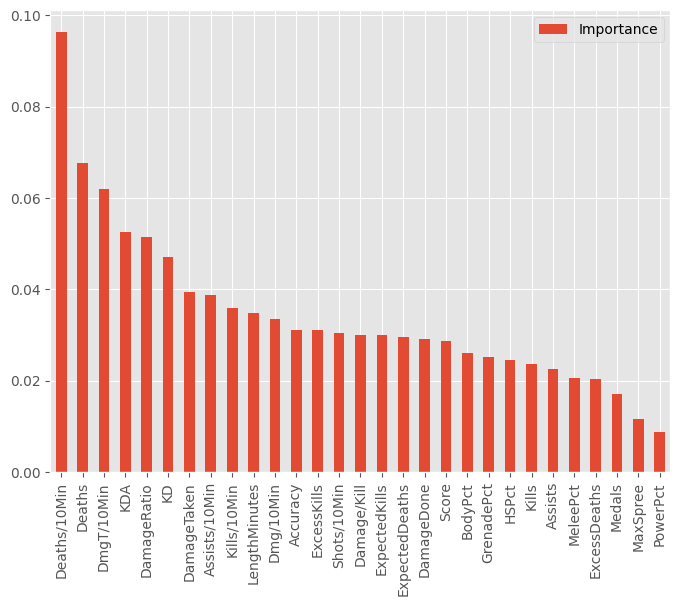

In [51]:
feat_importances = pd.DataFrame(rf_cv.best_estimator_.feature_importances_[:30], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Gradient Boosted Trees

In [52]:
# Gradient Boosted Trees
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gbrt = {'n_estimators': [100,300,500],'learning_rate': [0.01,0.1],'max_depth': [2,4,6], 'subsample': [0.5,0.6,0.8,1]}
GBRT = GridSearchCV(estimator=GradientBoostingClassifier(random_state=69),
                    cv=5, param_grid=param_grid_gbrt,n_jobs=-1)
GBRT.fit(X_train_preprocessed, y_train)

print(GBRT.best_estimator_)
print(f'Gradient Boosed Trees Accuracy: {GBRT.score(X_test_preprocessed, y_test)}')
GBRT.cv_results_
paramResults(GBRT)

GradientBoostingClassifier(max_depth=4, n_estimators=500, random_state=69,
                           subsample=0.6)
Gradient Boosed Trees Accuracy: 0.6814159292035398
    learning_rate_param  max_depth_param  n_estimators_param  subsample_param  \
0                  0.01                2                 100              0.5   
1                  0.01                2                 100              0.6   
2                  0.01                2                 100              0.8   
3                  0.01                2                 100              1.0   
4                  0.01                2                 300              0.5   
..                  ...              ...                 ...              ...   
67                 0.10                6                 300              1.0   
68                 0.10                6                 500              0.5   
69                 0.10                6                 500              0.6   
70                 0.1

''

In [53]:
ResultsOut(GBRT)

Acc: 0.681
MAE: 0.32
MSE: 0.32
RMSE: 0.56
R^2 Score: -0.31
OOS R^2 Score: -0.30
Log Loss: 11.48
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        47
           1       0.73      0.73      0.73        66

    accuracy                           0.68       113
   macro avg       0.67      0.67      0.67       113
weighted avg       0.68      0.68      0.68       113

---------------------------------------------------------


''

<AxesSubplot: >

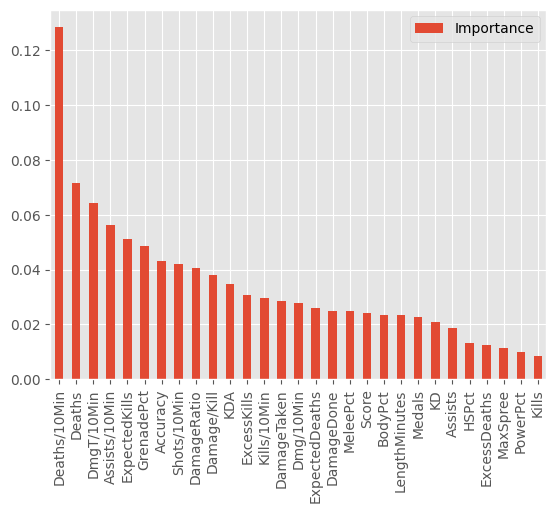

In [54]:
feat_importances = pd.DataFrame(GBRT.best_estimator_.feature_importances_[:30], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar')

## XGBoost

In [55]:
from xgboost import XGBClassifier

param_grid_xgb = {'n_estimators': [400,450,475,500],'learning_rate': [0.001,0.01,0.1,0.25],'max_depth': [1,2,3,4,5]}
XGB = GridSearchCV(estimator=XGBClassifier(random_state=69), cv=5, param_grid=param_grid_xgb,n_jobs=-1)
XGB.fit(X_train_preprocessed, y_train)

print(XGB.best_estimator_)
print(f'XGBoost Accuracy: {XGB.score(X_test_preprocessed, y_test)}')
paramResults(XGB)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=450, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=69, ...)
XGBoost Accuracy: 0.7079646017699115
    learning_rate_param  max_depth_param  n_estimators_param  Accuracy
0                 0.001                1                 400  0.677778
1                 0.001                1                 450  0.677778
2  

''

In [56]:
ResultsOut(XGB)

Acc: 0.708
MAE: 0.29
MSE: 0.29
RMSE: 0.54
R^2 Score: -0.20
OOS R^2 Score: -0.19
Log Loss: 10.53
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.62      0.64        47
           1       0.74      0.77      0.76        66

    accuracy                           0.71       113
   macro avg       0.70      0.69      0.70       113
weighted avg       0.71      0.71      0.71       113

---------------------------------------------------------


''

<AxesSubplot: >

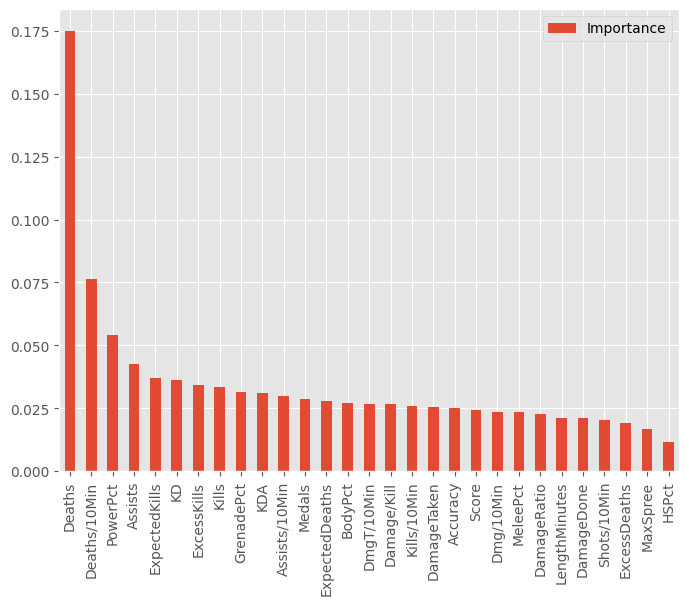

In [57]:
feat_importances = pd.DataFrame(XGB.best_estimator_.feature_importances_[:32], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Neural Net

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=61), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})
Neural Net Accuracy: 0.7256637168141593


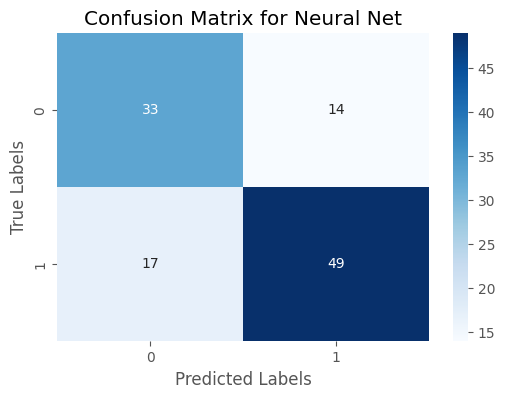

The confusion matrix shows the true positive, false negative, false positive, and true negative values, helping to evaluate the performance of a classification model.


<AxesSubplot: >

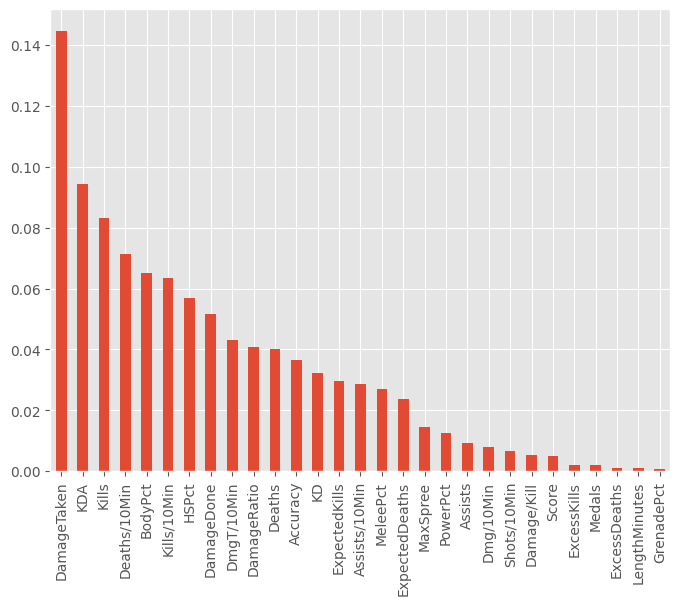

In [58]:
from sklearn.neural_network import MLPClassifier

param_grid_nn = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                'learning_rate': ['constant', 'invscaling', 'adaptive'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
nn = GridSearchCV(estimator=MLPClassifier(random_state=61), cv=5, param_grid=param_grid_nn, n_jobs=-1)

nn.fit(X_train_preprocessed, y_train)
print(nn)
print(f'Neural Net Accuracy: {nn.score(X_test_preprocessed, y_test)}')
from sklearn.metrics import confusion_matrix


# Generate confusion matrix for the Neural Net
conf_matrix = confusion_matrix(y_test, nn.predict(X_test_preprocessed))
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Neural Net')
plt.show()

print("The confusion matrix shows the true positive, false negative, false positive, and true negative values, helping to evaluate the performance of a classification model.")
feat_importances_nn = pd.DataFrame(nn.best_estimator_.coefs_[0].flatten()[:29], index=X_train.columns, columns=["Importance"])
feat_importances_nn = feat_importances_nn.abs().sum(axis=1)
feat_importances_nn = feat_importances_nn / feat_importances_nn.sum()
feat_importances_nn = feat_importances_nn.sort_values(ascending=False)[:29]
feat_importances_nn.plot(kind='bar', figsize=(8,6))


,Model,ACC,MAE,MSE,RMSE,R2,OOS R2,Log Loss
0,Logistic Regression,0.788,0.212,0.212,0.461,0.126,0.134,7.655
1,Lasso,0.752,0.248,0.248,0.498,-0.020,-0.010,8.931
2,Ridge,0.743,0.257,0.257,0.507,-0.056,-0.046,9.250
3,ElasticNet,0.735,0.265,0.265,0.515,-0.093,-0.082,9.569
4,NeuralNet,0.726,0.274,0.274,0.524,-0.129,-0.118,9.888
5,XGBoost,0.708,0.292,0.292,0.540,-0.202,-0.191,10.526
6,Random Forest,0.681,0.319,0.319,0.564,-0.311,-0.299,11.483
7,Gradient Boosted Trees,0.681,0.319,0.319,0.564,-0.311,-0.299,11.483
8,K-Nearest Neighbors,0.602,0.398,0.398,0.631,-0.639,-0.624,14.354


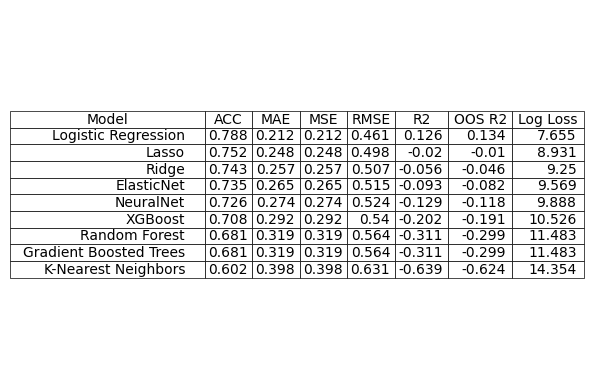

In [59]:
modelss = [logreg,ridge_cv,lasso_cv,elastic_cv,knn_cv,rf_cv,GBRT,XGB,nn]
model_namess = ['Logistic Regression', 'Ridge', 'Lasso', 'ElasticNet',
              'K-Nearest Neighbors', 'Random Forest', 'Gradient Boosted Trees', 'XGBoost', 'NeuralNet']
def saveResults(models, model_names):
    # Initialize an empty dataframe to store the metrics
    metrics_df = pd.DataFrame(columns=['Model', 'ACC' ,'MAE', 'MSE', 'RMSE', 'R2', 'OOS R2', 'Log Loss'])
    
    # Loop through each model and calculate the metrics
    for i, model in enumerate(models):
        # Generate predictions on the test set
        y_pred = model.predict(X_test_preprocessed)
        
        # Calculate regression metrics
        acc = round(model.score(X_test_preprocessed, y_test),3)
        mae = round(mean_absolute_error(y_test, y_pred),3)
        mse = round(mean_squared_error(y_test, y_pred),3)
        rmse = round(mean_squared_error(y_test, y_pred, squared=False),3)
        r2 = round(r2_score(y_test, y_pred),3)
        oosr2 = round(1-mean_squared_error(y_test,y_pred)/MSE_Histmean,3)
        ll = round(log_loss(y_test,y_pred),3)
        
        # Add metrics to the dataframe
        metrics_df.loc[i] = [model_names[i],acc, mae, mse, rmse, r2, oosr2, ll]
    
    metrics_df = metrics_df.sort_values('ACC', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots()
    table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns,
                     cellLoc='right', loc='center')
    table.auto_set_font_size(True)
    table.auto_set_column_width(col=list(range(len(metrics_df.columns))))
    ax.axis('off')
    plt.savefig('ModelResults0210.png', dpi=300, bbox_inches='tight')
    
    return metrics_df

saveResults(modelss,model_namess)


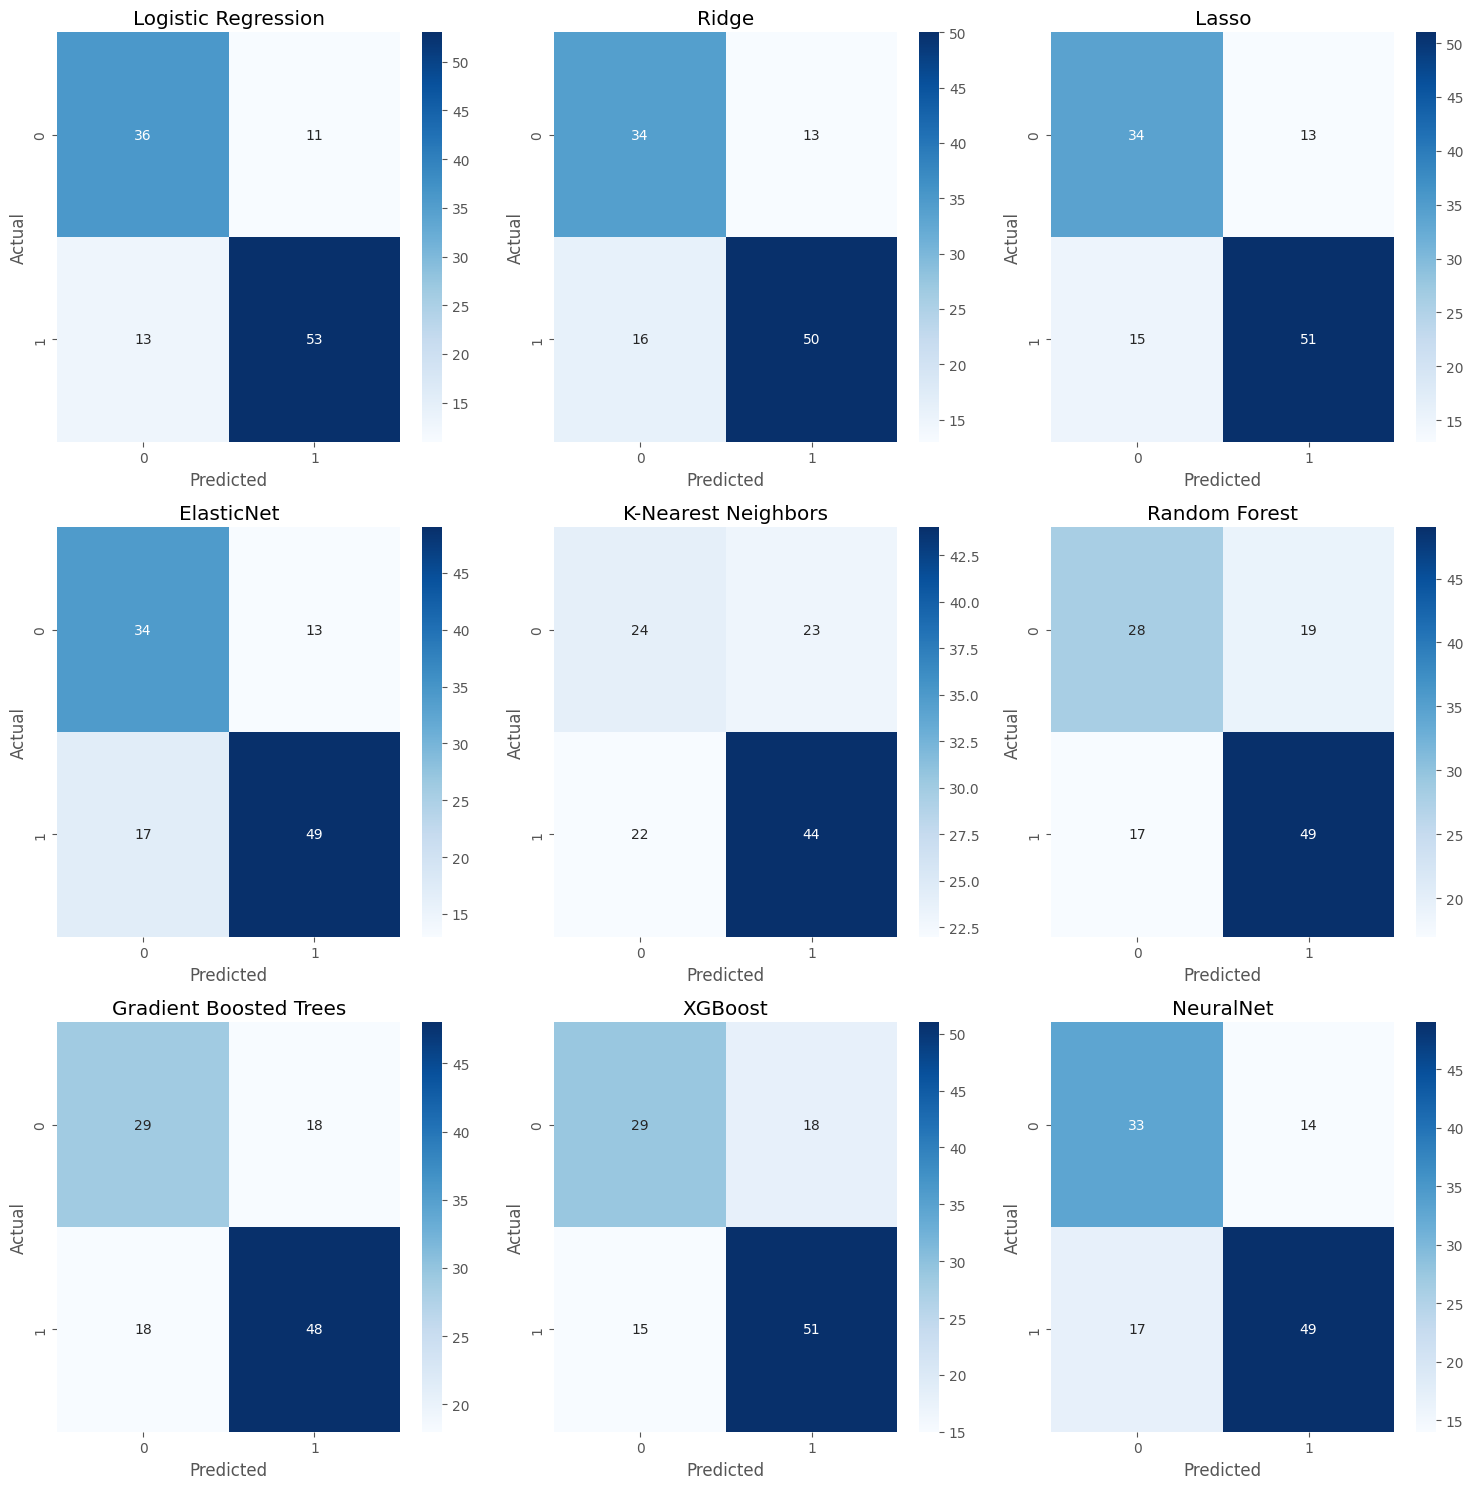

In [60]:
# Assuming X_test_preprocessed and y_test are your test data
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, (model, model_name) in enumerate(zip(modelss, model_namess)):
    y_pred = model.predict(X_test_preprocessed)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(model_name)
    axs[i//3, i%3].set_xlabel('Predicted')
    axs[i//3, i%3].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('Plots/ConfusionMatrixMultigraph.png', dpi=300, bbox_inches='tight')
plt.show()

In [61]:
print(f'Runtime: {round(time.perf_counter() - start,2)}s')

Runtime: 78.92s


In [62]:
X_trainp_df = pd.DataFrame(X_train_preprocessed, columns=X_train.columns)
round(X_trainp_df.describe().transpose(),3).sort_values(by='max',ascending=False)

,count,mean,std,min,25%,50%,75%,max
DamageRatio,450.0,0.0,1.001,-0.567,-0.237,-0.068,0.094,20.228
KD,450.0,-0.0,1.001,-1.314,-0.539,-0.211,0.223,11.469
Damage/Kill,450.0,-0.0,1.001,-1.941,-0.658,-0.214,0.455,6.734
PowerPct,450.0,-0.0,1.001,-0.372,-0.372,-0.372,-0.372,6.331
Shots/10Min,450.0,0.0,1.001,-3.596,-0.591,-0.002,0.600,6.263
Accuracy,450.0,-0.0,1.001,-2.844,-0.644,0.023,0.579,5.573
Assists,450.0,0.0,1.001,-1.776,-0.581,-0.103,0.614,4.678
Medals,450.0,0.0,1.001,-1.749,-0.648,-0.098,0.453,4.582
DamageDone,450.0,0.0,1.001,-2.484,-0.744,-0.153,0.652,4.029
ExpectedKills,450.0,-0.0,1.001,-2.822,-0.799,-0.124,0.776,3.924
